<a href="https://colab.research.google.com/github/isismeira/classificacao_roupas_redes_neurais/blob/main/classificacao_com_redes_neurais_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de peças de roupas com redes neurais *feedforward*

***Objetivo***: Utilizando um conjunto de dados contendo várias imagens de peças de roupa, criar uma rede neural *Perceptron Multicamadas (MLP)*  capaz de reconhecer e classificar corretamente cada tipo de peça.

***Arquitetura da rede neural***: Como tarefa é de uma classificação multiclasse, o recomendado é que tenha:  


*   Um neurônio para cada característica de entrada
*   Entre 1 e 5 camadas ocultas
*   Entre 10 a 100 neurônios por camada oculta
*   1 neurônio de saída por classe
*   Ativação da camada de saída softmax
*   Função de perda de entropia cruzada

***Dataset***: Fashion MNIST é um dataset substituto direto do MNIST, contendo o mesmo formato: 70 mil imagens pré-processadas em escala de cinza 28x28 pixels cada, com 10 classes diferentes.

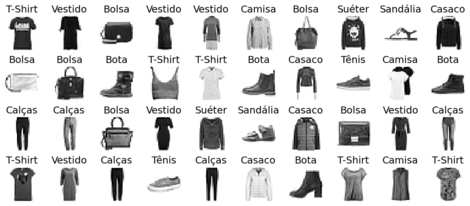

## Importação das bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Conhecendo o dataset Fashion MNIST

Podemos carregar o conjunto Fashion MNIST usando o Keras

In [ ]:
fashion = keras.datasets.fashion_mnist
(X_treino_completo, Y_treino_completo), (X_teste, Y_teste) = fashion.load_data()

O Keras inicializa a imagem representada como uma matriz 28x28

In [ ]:
X_treino_completo.shape

(60000, 28, 28)

As intensidades dos pixels são representadas como inteiros ao invés de floats

In [ ]:
X_treino_completo.dtype

dtype('uint8')

Criando um conjunto de validação e escalonando as intensidades de pixels até o intervalo de 1 a 0 e dividindo-as por 255.0 (também transformando-as em float) por conta do treinamento com gradiente descendente

In [ ]:
X_treino, X_validacao, Y_treino, Y_validacao = train_test_split(
    X_treino_completo,
    Y_treino_completo,
    test_size=5000,
    random_state=42,
    stratify=Y_treino_completo
)

# Normalização APÓS a divisão
X_treino = X_treino / 255.0
X_validacao = X_validacao / 255.0
X_teste = X_teste / 255.0

Adicionando o nome das classes...

In [ ]:
classes = ["T-Shirt", "Calças", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

Para confirmar se as classes estão corretas...

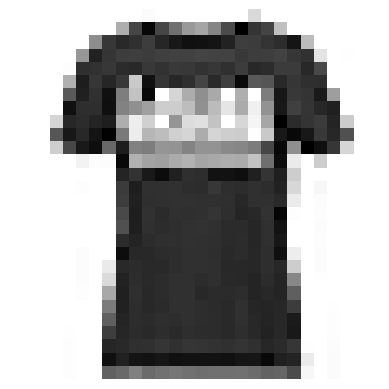

In [ ]:
plt.imshow(X_treino[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
classes[Y_treino[0]]

'T-Shirt'

A classe nomeada de fato corresponde à imagem

## Criando o modelo com a Sequential API

Construindo a rede neural...

In [ ]:
modelo = keras.models.Sequential([ # cria um modelo Sequential, constituída de uma pilha de camadas sequencialmente conectadas
    keras.layers.Flatten(input_shape=[28,28]), # converte cada entrada em uma matriz 1D
    keras.layers.Dense(300, activation="relu"), # camada oculta com 300 neurônios e função de ativação ReLU
    keras.layers.Dense(100, activation="relu"), # camada oculta com 100 neurônios e função de ativação ReLU
    keras.layers.Dense(10, activation="softmax") # ativação da camada de saída softmax
])

Exibindo todas as camadas do modelo:

In [ ]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

A primeira camada Dense tem pesos de conexão de 784 x 300 e 300 vieses, que somam juntos 235.500 parâmetros. Isso viabiliza bastante flexibilidade para ajustar os dados de treinamento, mas faz com que talvez o modelo corra o risco de se sobreajustar

Outra forma de observar a arquitetura do modelo:

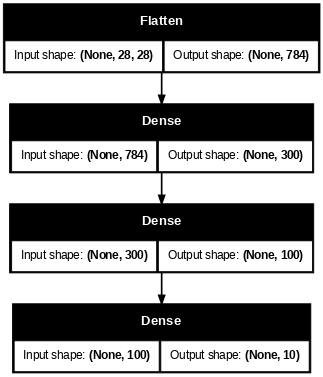

In [ ]:
tf.keras.utils.plot_model(modelo, "arquitetura_do_modelo.png", show_shapes=True, dpi=60)

Vou acessar a lista de modelos para selecionar a primeira camada oculta

In [ ]:
modelo.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [ ]:
oculta_1 = modelo.layers[1]

Observando os pesos e vieses da primeira camada oculta

In [ ]:
pesos, vieses = oculta_1.get_weights()

In [ ]:
pesos

array([[ 0.05509908, -0.00718958, -0.05691091, ...,  0.05667271,
         0.02558178, -0.00912812],
       [ 0.01121263, -0.00714499, -0.02401223, ..., -0.06258027,
        -0.05147259,  0.06573543],
       [ 0.00104555,  0.01605749,  0.00610869, ...,  0.05261062,
         0.02102187,  0.03855491],
       ...,
       [-0.06123811,  0.00607686, -0.0651528 , ...,  0.00961244,
         0.03930574, -0.07376194],
       [ 0.05591752, -0.01596976,  0.04212957, ...,  0.01651352,
         0.00130873, -0.0326992 ],
       [ 0.03905659, -0.07064916,  0.06690118, ...,  0.0223421 ,
        -0.01680575, -0.00949389]], dtype=float32)

Pesos inicializados aleatóriamente para quebrar a simetria

In [ ]:
pesos.shape

(784, 300)

Vieses inicializados em 0, como padrão

In [ ]:
vieses

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
vieses.shape

(300,)

## Compilando o modelo

Chamando o método compile para especificar a função de perda e o otimizador utilizado

In [ ]:
modelo.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

"sparse_categorical_crossentropy" foi escolhida pois os rótulos do dataset são esparsos e as classes são exclusivas. O otimizador "sgd" foi escolhido pois o modelo será treinado usando um gradiente descendente estocástico simples, logo, o Keras rodará o algoritmo de retropropagação

## Treinando e avaliando o modelo

In [ ]:
historico = modelo.fit(X_treino, Y_treino, epochs=30,
                    validation_data=(X_validacao, Y_validacao))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6853 - loss: 1.0024 - val_accuracy: 0.8238 - val_loss: 0.5017
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8244 - loss: 0.5044 - val_accuracy: 0.8442 - val_loss: 0.4418
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8466 - loss: 0.4415 - val_accuracy: 0.8662 - val_loss: 0.3898
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8537 - loss: 0.4244 - val_accuracy: 0.8568 - val_loss: 0.4076
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.4068 - val_accuracy: 0.8746 - val_loss: 0.3597
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8678 - loss: 0.3825 - val_accuracy: 0.8702 - val_loss: 0.3640
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8689 - loss: 0.3703 - val_accuracy: 0.8736 - val_loss: 0.3547
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8741 - loss: 0.3634 

Épocas 1–5:
*  Perda (loss) cai rapidamente de 1.00 para 0.41
*  Acurácia de treino sobe bem de 68% para 85%
*  Acurácia de validação também sobe de 82% para 87%

Sinal de que a arquitetura e os hiperparâmetros estão bem ajustados — o modelo está aprendendo bem nos primeiros ciclos.

Épocas 6–17:

*  Acurácia de validação oscila entre 87% e 89%

*  Perda de validação cai de 0.36 para 0.29, com pequenas flutuações

Aqui o modelo começa a refinar os pesos, mas já está próximo do plateau (estabilização da performance).

Épocas 18–24:
*  acurácia de treino subindo
*  validação estagnada ou oscilamdo pouco
*  val_loss sobe de 0.29 → 0.31 na época 24

Isso pode indicar overfitting leve: o modelo está decorando mais do que generalizando.

Épocas 25–30:
*  Acurácia de validação sobe até 90.1%
*  val_loss melhora: 0.284 → 0.275 (época 30)

Apesar do risco anterior, o modelo ainda conseguiu melhorar. Então, nesse caso, o overfitting não foi crítico, o modelo está com uma boa generalização



---



Para ter uma visualização mais clara, vou plotar as curvas de aprendizado

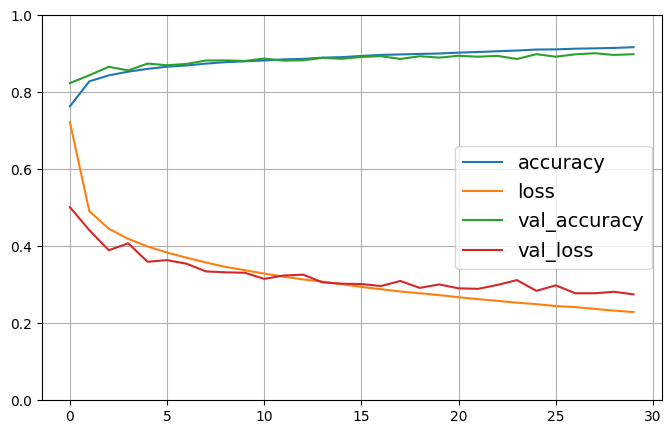

In [ ]:
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

A acurácia do treinamento e a acurácia de validação aumentam  progressivamente durante o treinamento enquanto a perda do treinamento e a perda da validação diminuem, o que é bom. Além disso as curvas de validação estão próximas das curvas de treinamento, o que indica que não há sobreajuste excessivo

In [ ]:
modelo.evaluate(X_teste, Y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3318


[0.32741495966911316, 0.8817999958992004]

Ao utilizar o método evaluate, observa-se que a perda é baixa e a acurácia é alta, o que é um ótimo indicador

## Fazendo predições com o modelo

Tentando preves as três primeiras instâncias do conjunto de teste

In [ ]:
X_novos = X_teste[:3]
Y_prob = modelo.predict(X_novos)
Y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Na primeira instância, teve uma pequena dúvida sobre a bota e o tênis, o que faz sentido, já que são calçados. Mas A escolha gritante foi para a bota

In [ ]:
Y_pred = Y_prob.argmax(axis=-1)
Y_pred

array([9, 2, 1])

In [ ]:
np.array(classes)[Y_pred]

array(['Bota', 'Suéter', 'Calças'], dtype='<U8')

O modelo previu as classes Bota, Suéter e Calças respectivamente

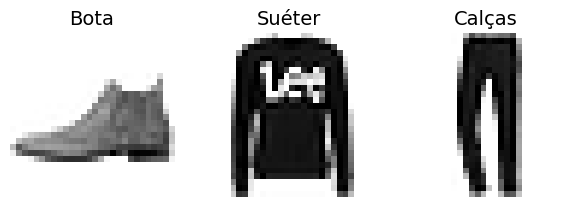

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_novos):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(classes[Y_teste[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

O modelo classificou as três imagens corretamente!